### RASTER Computing GDAL

In [1]:
import sys
try:
    from osgeo import ogr, osr, gdal
    print("Installed!")
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')

Installed!


#### Open a dataset


In [2]:
import os

dir = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster"
dsPath = os.path.join(dir, '2014.tif')
dsPath

'C:\\Users\\Zako3\\Downloads\\Handouts\\exercise_data_raster\\2014.tif'

In [3]:
raster = gdal.Open(dsPath)
if raster is not None:
    print("File was opened!")

File was opened!


C:\Users\Zako3\anaconda3\envs\python_foundation\Lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


#### Access to Metadata

In [4]:
print('Raster size X:',  raster.RasterXSize)

Raster size X: 300


In [6]:
print('Raster size Y:',  raster.RasterYSize)

Raster size Y: 350


In [7]:
raster.RasterCount

365

In [8]:
raster.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [9]:
raster.GetProjection()

# EPSG:4289 
# European Petroleum Survey Group

'PROJCS["Amersfoort / RD New",GEOGCS["Amersfoort",DATUM["Amersfoort",SPHEROID["Bessel 1841",6377397.155,299.1528128,AUTHORITY["EPSG","7004"]],AUTHORITY["EPSG","6289"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4289"]],PROJECTION["Oblique_Stereographic"],PARAMETER["latitude_of_origin",52.1561605555556],PARAMETER["central_meridian",5.38763888888889],PARAMETER["scale_factor",0.9999079],PARAMETER["false_easting",155000],PARAMETER["false_northing",463000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","28992"]]'

#### GDAL Affine Geotransforation

https://gdal.org/tutorials/geotransforms_tut.html

In [9]:
g = raster.GetGeoTransform()
g

(0.0, 1000.0, 0.0, 640000.0, 0.0, -1000.0)

In [8]:
print("top-left x:", g[0])
print("top left y:", g[3])
print("pixel-size w-e:", g[1]) # 
print("pixel-size n-s:", g[5])  # It goes down
print("rotation x:", g[2])
print("rotation y:", g[4])

top-left x: 0.0
top left y: 640000.0
pixel-size w-e: 1000.0
pixel-size n-s: -1000.0
rotation x: 0.0
rotation y: 0.0


#### Convert to GDAL to NumPY



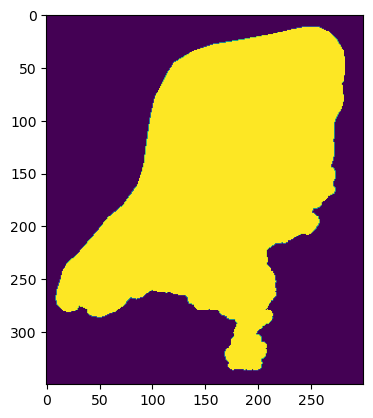

In [10]:
from osgeo import gdal_array as gdarr

import matplotlib.pyplot as plt

band = raster.GetRasterBand(1)
offset_x = 0
offset_y = 0
win_width = 300
win_height = 350

arr = gdarr.BandReadAsArray(band, offset_x, offset_y, win_width, win_height)

plt.imshow(arr)

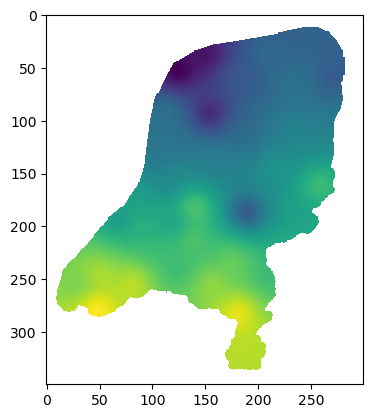

In [11]:
from osgeo import gdal_array as gdarr
import matplotlib.pyplot as plt

band = raster.GetRasterBand(1)
offset_x = 0
offset_y = 0
win_width = 300
win_height = 350

arr = gdarr.BandReadAsArray(band, offset_x, offset_y, win_width, win_height)

arr[arr == -9999] = None

plt.imshow(arr)

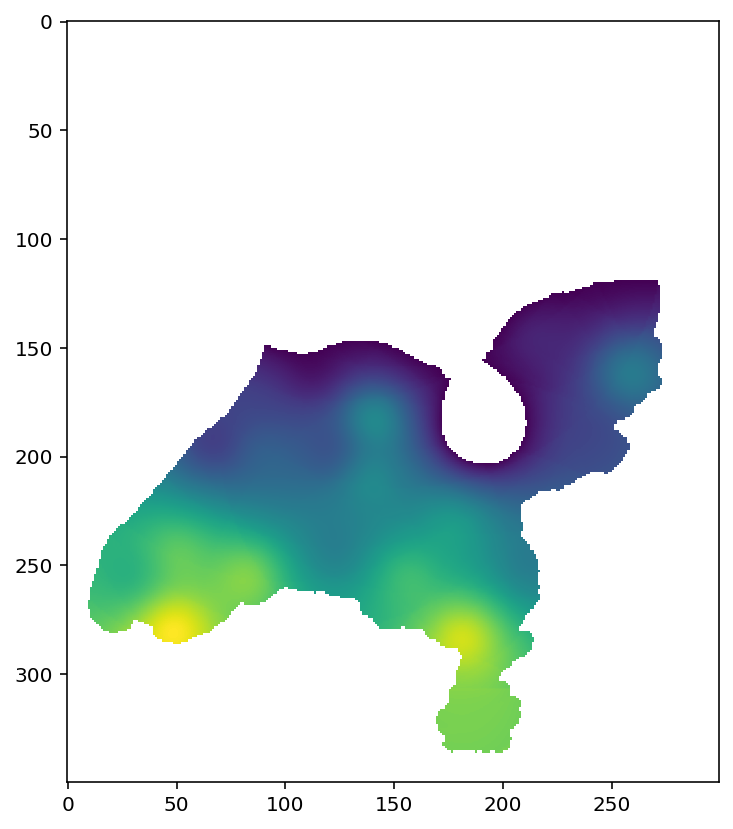

In [48]:
from osgeo import gdal_array as gdarr
import matplotlib.pyplot as plt

band = raster.GetRasterBand(1)
offset_x = 0
offset_y = 0
win_width = 300
win_height = 350

arr = gdarr.BandReadAsArray(band, offset_x, offset_y, win_width, win_height)

arr[arr < 9] = None

plt.imshow(arr)

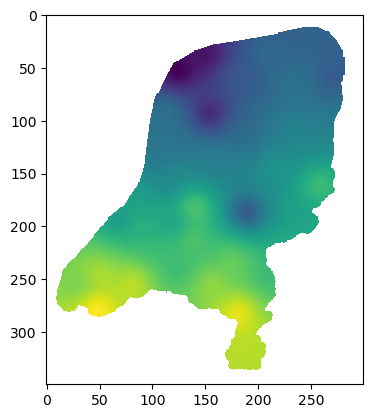

In [12]:
from osgeo import gdal_array as gdarr
import matplotlib.pyplot as plt


offset_x = 0
offset_y = 0
win_width = 300
win_height = 350

arr = gdarr.BandReadAsArray(band, offset_x, offset_y, win_width, win_height)

arr[arr < 5 ] = None

plt.imshow(arr)

(365, 350, 300)
3
(350, 300)
2


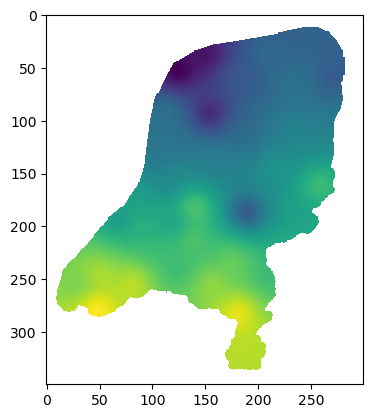

In [4]:
from osgeo import gdal_array as gdarr
import matplotlib.pyplot as plt

offset_x = 0
offset_y = 0
win_width = 300
win_height = 350

arr = gdarr.DatasetReadAsArray(raster, offset_x, offset_y, win_width, win_height)

print(arr.shape)
print(arr.ndim)


first_band = arr[0]
print(first_band.shape)
print(first_band.ndim)

first_band[first_band < 5 ] = None

plt.imshow(first_band)

### Save the Raster

In [5]:
# 1. Create a driver 
driver = raster.GetDriver()

# 2. Create a new raster 
new_raster = driver.Create('new.tiff', win_width, win_height, 1, gdal.GDT_Float32)

# 3. Assign a Projection 
prj = raster.GetProjection()
new_raster.SetProjection(prj)

# 4. Set GeoTransform 
t = raster.GetGeoTransform()
new_raster.SetGeoTransform(t)

# 5. Create Bands from Array 
band = new_raster.GetRasterBand(1)
band.WriteArray(first_band)
band.SetNoDataValue(-99999)
band.FlushCache()
band = None

new_raster = None
print('Finish')


Finish


In [16]:
# Full Code 
# 1- Create a driver
driver = raster.GetDriver()
# or
# driver = dgal.GetDriverByName('GTiff')

# 2- Create a new raster
new_raster = driver.Create('new_raster_gdal.tiff', win_width, win_height, 1, gdal.GDT_Float32)


# C3- Assign a projection
prj = raster.GetProjection()
new_raster.SetProjection(prj)

# 4- Set the GeoTransform
t = raster.GetGeoTransform()
new_raster.SetGeoTransform(t)

band = new_raster.GetRasterBand(1)
band.WriteArray(first_band)
band.SetNoDataValue(-9999)
band.FlushCache()
band = None

new_raster = None
print('Finish')

Finish
